In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
df = pd.read_csv('/content/drive/MyDrive/Data/microchips.csv')

In [27]:
df.head()

,feature 1,feature 2,pass = 1
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [29]:
X = df[['feature 1','feature 2']].values
y = df['pass = 1'].values

In [30]:
X_train, X_val_test, y_train, y_val_test = train_test_split(X,y,test_size=0.3,random_state=4)
X_val, X_test, y_val, y_test = train_test_split(X_val_test,y_val_test,test_size=0.5)

In [39]:
def powers(X,d):
  X_p = X
  for k in range(2,d+1):
    for s in range(k+1):
      X_p = np.c_[X_p,X[:,0]**(k-s)*X[:,1]**s]
  return X_p  

In [40]:
d = 2
X_train_p = powers(X_train,d)  
X_val_p = powers(X_val,d)  
X_test_p = powers(X_test,d)  

In [41]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train_p)
X_train_scaled = scaler.transform(X_train_p)
X_val_scaled = scaler.transform(X_val_p)
X_test_scaled = scaler.transform(X_test_p)

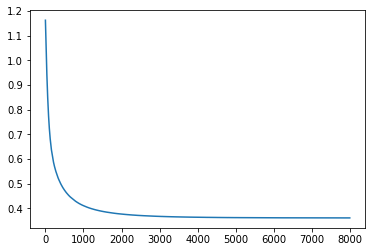

In [42]:
model = Sequential()
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='SGD',loss='binary_crossentropy')
model.fit(X_train_scaled,y_train,epochs=8000,verbose=0)
J_list = model.history.history['loss']
plt.plot(J_list)

In [43]:
J_train = model.evaluate(X_train_scaled,y_train)
J_val = model.evaluate(X_val_scaled,y_val)
J_test = model.evaluate(X_test_scaled,y_test)
print(J_train,J_val,J_test)
predictions_train = model.predict_classes(X_train_scaled)
print(classification_report(y_train,predictions_train))
predictions_val = model.predict_classes(X_val_scaled)
print(classification_report(y_val,predictions_val))
predictions_test = model.predict_classes(X_test_scaled)
print(classification_report(y_test,predictions_test))

1/1 [==============================] - 0s 16ms/step - loss: 0.3356
0.3614184558391571 0.3392392694950104 0.33557939529418945
              precision    recall  f1-score   support

           0       0.84      0.84      0.84        43
           1       0.82      0.82      0.82        39

    accuracy                           0.83        82
   macro avg       0.83      0.83      0.83        82
weighted avg       0.83      0.83      0.83        82

              precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       0.91      0.83      0.87        12

    accuracy                           0.83        18
   macro avg       0.81      0.83      0.82        18
weighted avg       0.84      0.83      0.84        18

              precision    recall  f1-score   support

           0       0.83      0.91      0.87        11
           1       0.83      0.71      0.77         7

    accuracy                           0.83        18
   

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(-1.0, 1.2)

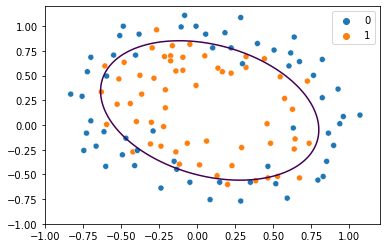

In [44]:
sns.scatterplot(X[:,0],X[:,1],hue=y)
xl, xr, dx = -1, 1.2, 0.01
yl, yr, dy = -1, 1.2, 0.01
u = np.arange(xl,xr,dx)
v = np.arange(yl,yr,dy)
u_r = np.ones((len(v),1))*u.reshape(1,len(u))
v_r = v.reshape(len(v),1)*np.ones((1,len(u)))
u_r = u_r.reshape(-1)
v_r = v_r.reshape(-1)
p_grid = np.column_stack((u_r,v_r))
p_grid_p = powers(p_grid,d) 
p_grid_scaled = scaler.transform(p_grid_p)
f_grid = model.predict(p_grid_scaled)
f_grid = f_grid.reshape((len(v),len(u)))
plt.contour(u,v,f_grid,levels=[0.5])
plt.xlim(-1,1.2)
plt.ylim(-1,1.2)

1
1/1 [==============================] - 0s 18ms/step - loss: 0.7020
2
1/1 [==============================] - 0s 17ms/step - loss: 0.3346
3
1/1 [==============================] - 0s 17ms/step - loss: 0.3359
4
1/1 [==============================] - 0s 16ms/step - loss: 0.3914
5
1/1 [==============================] - 0s 17ms/step - loss: 0.5353
6
1/1 [==============================] - 0s 17ms/step - loss: 0.5324
7
1/1 [==============================] - 0s 18ms/step - loss: 0.6013
8
1/1 [==============================] - 0s 18ms/step - loss: 0.6051
9
1/1 [==============================] - 0s 16ms/step - loss: 0.6279
10
1/1 [==============================] - 0s 16ms/step - loss: 0.6289


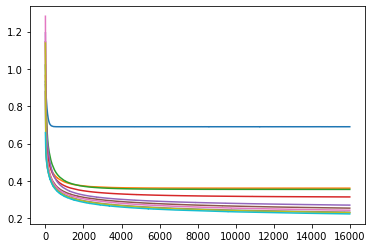

In [45]:
ds = np.arange(1,11)
J_val = np.empty(0)
J_train = np.empty(0)
for d in ds:
  print(d)
  X_train_p = powers(X_train,d)  
  X_val_p = powers(X_val,d)  
  X_test_p = powers(X_test,d)
  scaler = preprocessing.StandardScaler()
  scaler.fit(X_train_p)
  X_train_scaled = scaler.transform(X_train_p)
  X_val_scaled = scaler.transform(X_val_p)
  X_test_scaled = scaler.transform(X_test_p)
  model = Sequential()
  model.add(Dense(1, activation='sigmoid'))
  model.compile(optimizer='SGD',loss='binary_crossentropy')
  model.fit(X_train_scaled,y_train,epochs=16000,verbose=0)
  J_list = model.history.history['loss']
  plt.plot(J_list)
  J_train = np.append(J_train,model.evaluate(X_train_scaled,y_train))
  J_val = np.append(J_val,model.evaluate(X_val_scaled,y_val))

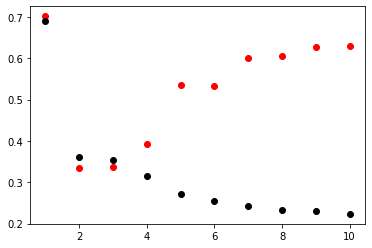

In [46]:
plt.plot(ds,J_val,'ro')
plt.plot(ds,J_train,'ko')